In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import librosa
from scipy.signal import butter, lfilter, freqz,filtfilt
import os
import IPython.display as ipd
%matplotlib inline

In [3]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a


def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [4]:
x,sr = librosa.load("./datasets/cmu_us_bdl_arctic/orig//arctic_a0001.wav",sr=16000,mono=False)

In [5]:
_,idx = librosa.effects.trim(x[0])

In [6]:
idx[1]

56480

In [7]:
for idx,drt in enumerate(os.listdir('./datasets/voco')):
    for file in os.listdir('./datasets/voco/'+drt):
        if 'EGG' in file and ('wav' in file or 'WAV' in file):
            x,sr = librosa.load('./datasets/voco/'+drt+'/'+file,sr=48000,mono=False)
            x = librosa.resample(x, sr, 16000)
    break

In [8]:
ipd.Audio(x[0],rate=16000)

In [9]:
speech = x[0]
egg = x[1]
filtered_speech = butter_highpass_filter(butter_lowpass_filter(speech,1000,16000,3),10,16000,3)

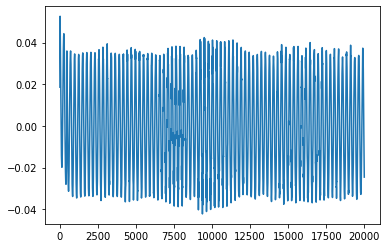

In [18]:
plt.plot(filtered_speech[:20000])

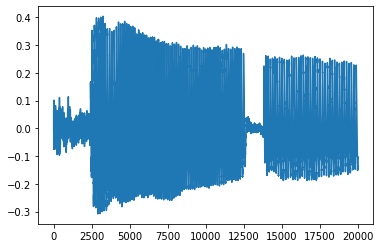

In [19]:
plt.plot(egg[:20000])

In [14]:
ipd.Audio(filtered_speech,rate=16000)

In [ ]:
plt.plot(speech[6000:8000])

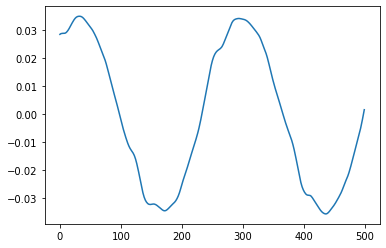

In [20]:
plt.plot(filtered_speech[6000:6500])

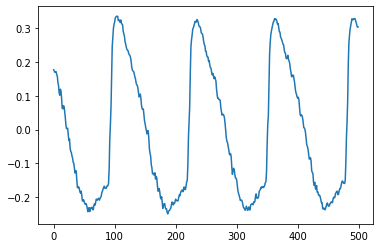

In [22]:
plt.plot(egg[6000:6500])

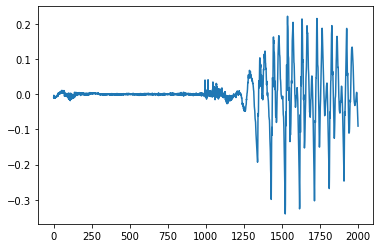

In [45]:
plt.plot(speech[6000:8000])

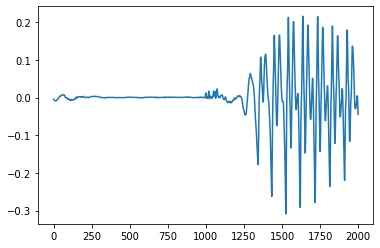

In [47]:
plt.plot(filtered_speech[6000:8000])

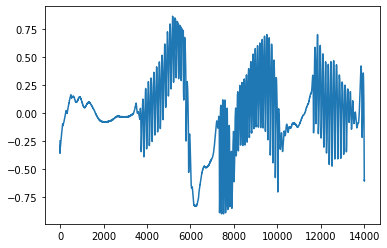

In [31]:
plt.plot(egg[:14000])